«Я очень богатый человек, поэтому я решил отдать вам часть своего состояния. В этом мешке 5001 жемчужин, 2501 из которых белые, а 2500 - черные. Нет, я не расист. Я позволю вам вытащить любое количество жемчужин из сумки, не глядя.   
Если вы возьмете одинаковое количество черных и белых жемчужин, я подарю вам столько золотых слитков, сколько вы взяли жемчужин». Сколько жемчужин вы вытащите?

Будем вытаскивать 2*x жемчужин

$$x = \overline{1,2500}$$

\begin{equation}
P(x)=\frac{\binom{2500}{x}\binom{2501}{x}}{\binom{5001}{2x}}=
\end{equation}

\begin{equation}
\\=
\frac{\frac{(2500)!}{x!\,(2500-x)!}\frac{(2501)!}{x!\,(2501-x)!}}{\frac{(5001)!}{(2x)!\,(5001-2x)!}} = 
\end{equation}

\begin{equation}
\\=
\frac{2500! \, 2501! \, (2x)! \, (5001-2x)!} {5001! \, x! \, x! \, (2500-x)! \, (2501 - x)!} = 
\end{equation}

\begin{equation}
\\=
\frac{\displaystyle 
\bigg( \prod_{i=1}^{2500} i \bigg) 
\bigg( \prod_{i=x+1}^{2x} i \bigg)  
\bigg( \prod_{i=1}^{5001-2x} i \bigg)
} 
{\displaystyle 
\bigg( \prod_{i=2502}^{5001} i \bigg) 
\bigg( \prod_{i=1}^{x} i \bigg)
\bigg( \prod_{i=1}^{2500-x} i^2 \bigg)
(2501-x)
}.
\end{equation}

\begin{equation}
P(x) = c0 * c1(x) * c2(x),
\\c0 = \frac{\displaystyle \bigg( \prod_{i=1}^{2500} i \bigg) }{\displaystyle \bigg( \prod_{i=2502}^{5001} i \bigg) } ,\ 
c1(x) = \frac{\displaystyle \bigg( \prod_{i=x+1}^{2x} i \bigg)}{\displaystyle \bigg( \prod_{i=1}^{x} i \bigg) } ,\ 
c2(x) = \frac{1}{(2501-x) }
\frac{\displaystyle \bigg( \prod_{i=1}^{5001-2x} i \bigg)}{\displaystyle \bigg( \prod_{i=1}^{2500-x} i^2 \bigg) }
\end{equation}

In [7]:

# mapx = {}

# for x in range(2, 2500 + 1
#     en = den = 1
#     for i in range(x+1, 2*x+1):
#         en *= i
#     for i in range(1, 5001-2*x + 1):
#         en *= i
#     for i in range(1, x + 1):
#         den *= i
#     for i in range(1, 2500 - x + 1):
#         den *= i*i
#     den *= (2501-x)
#     print('p(%d) = ' % x )
#     mapx[x] = divmod(en, den)[0]

In [1]:
mapx = {}
mapc = {'c1_en' : 1,
        'c1_den': 1,
        'c2_en' : 1,
        'c2_den': 1}

en = den = 1
for i in range(1, 2501):
    en *= i
for i in range(2502, 5002):
    den *= i
mapc['c0_en'] = en 
mapc['c0_den'] = den

en = den = 1
x = 1
for i in range(x+1, 2*x+1):
        mapc['c1_en'] *= i
for i in range(1, 5001-2*x + 1):
        mapc['c2_en'] *= i
for i in range(1, x + 1):
        mapc['c1_den'] *= i
for i in range(1, 2500 - x + 1):
        mapc['c2_den'] *= i #*i
en *= mapc['c1_en'] * mapc['c2_en']
den *= (2501-x) * mapc['c1_den'] * mapc['c2_den'] * mapc['c2_den']#remv
mapx[x] = en // den


for x in range(2, 2500 + 1):
    en = den = 1
    mapc['c1_en'] //= x
    for i in range(2*(x-1) + 1, 2*x + 1): #(x+1, 2*x+1): 
        mapc['c1_en'] *= i
    for i in range(5001 - 2*x + 1, 5001-2*(x-1) + 1):
        mapc['c2_en'] //= i
    
    mapc['c1_den'] *= x
    mapc['c2_den'] //= (2500 - x + 1) #*(2500 - x + 1)
    en *= mapc['c1_en'] * mapc['c2_en']
    den *= (2501-x) * mapc['c1_den'] * mapc['c2_den'] * mapc['c2_den']#remv 
    mapx[x] = en // den
    print(x)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [2]:
#imapx = {v: k for k, v in mapx.items()}
x_array = []
imapx={}
for k, v in mapx.items():
    x_array.append(k)
    if v not in imapx:
        imapx[v] = k
    else:
        print('%d and %d' % (imapx[v], k) )
import collections 
or_imax = collections.OrderedDict(sorted(imapx.items()))
list_ix = []
for key, value in or_imax.items():
    temp = [key,value]
    list_ix.append(temp)
len(or_imax)

1250 and 1251
1249 and 1252
1248 and 1253
1247 and 1254
1246 and 1255
1245 and 1256
1244 and 1257
1243 and 1258
1242 and 1259
1241 and 1260
1240 and 1261
1239 and 1262
1238 and 1263
1237 and 1264
1236 and 1265
1235 and 1266
1234 and 1267
1233 and 1268
1232 and 1269
1231 and 1270
1230 and 1271
1229 and 1272
1228 and 1273
1227 and 1274
1226 and 1275
1225 and 1276
1224 and 1277
1223 and 1278
1222 and 1279
1221 and 1280
1220 and 1281
1219 and 1282
1218 and 1283
1217 and 1284
1216 and 1285
1215 and 1286
1214 and 1287
1213 and 1288
1212 and 1289
1211 and 1290
1210 and 1291
1209 and 1292
1208 and 1293
1207 and 1294
1206 and 1295
1205 and 1296
1204 and 1297
1203 and 1298
1202 and 1299
1201 and 1300
1200 and 1301
1199 and 1302
1198 and 1303
1197 and 1304
1196 and 1305
1195 and 1306
1194 and 1307
1193 and 1308
1192 and 1309
1191 and 1310
1190 and 1311
1189 and 1312
1188 and 1313
1187 and 1314
1186 and 1315
1185 and 1316
1184 and 1317
1183 and 1318
1182 and 1319
1181 and 1320
1180 and 1321
1179 a

1250

0.5000999800039992
1


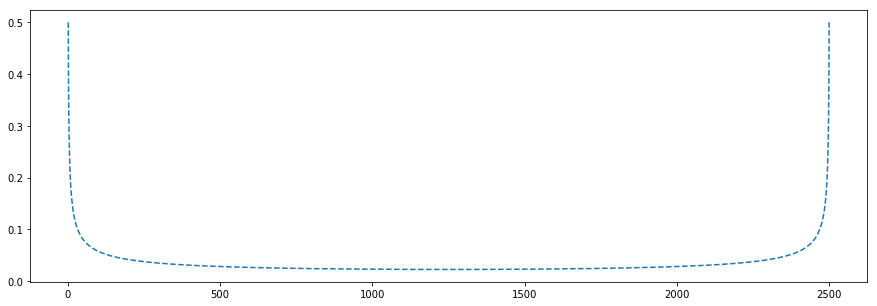

In [3]:
# for e in list_ix[1]:
#     print(e)
# #print(mapc['c0_den'] )
# v = list_ix[0][0] * mapc['c0_en'] / mapc['c0_den']
# print(v)
v = list_ix[1249][0] * mapc['c0_en'] / mapc['c0_den']
print(v)
print(list_ix[1249][1])
p_array = []
for e in list_ix:
    p_array.append(e[0] * mapc['c0_en'] / mapc['c0_den'])
p_array = list(reversed(p_array)) + p_array

from matplotlib import pyplot as plt

plt.figure(figsize = (15, 5))
plt.plot(x_array, p_array, '--')
plt.show()


Видно, что распределение симметричное и максимум достигается в точках (1) и (2500), в которых вероятность ~50%  
Поэтому разумно выбрать 2 * 2500 жемчужин, т.к. имется шанс 50% получить 5000 слитков золота